# Exploratory Data Analysis
## Import Packages

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

## Initialize Data Frames

In [8]:
client_data = pd.read_csv('client_data.csv')
price_data = pd.read_csv('price_data.csv')

## Understanding the Data

In [3]:
client_data.head(10)


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0
5,1aa498825382410b098937d65c4ec26d,usilxuppasemubllopkaafesmlibmsdf,8302,0,1998,2011-12-09,2016-12-09,2015-11-01,2015-12-10,796.94,...,f,181.21,33.12,33.12,1,118.89,4,lxidpiddsbxsbosboudacockeimpuepw,13.200,1
6,7ab4bf4878d8f7661dfc20e9b8e18011,foosdfpfkusacimwkcsosbicdxkicaua,45097,0,0,2011-12-02,2016-12-02,2011-12-02,2015-12-03,8069.28,...,f,0.00,4.04,4.04,1,346.63,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,1
7,01495c955be7ec5e7f3203406785aae0,foosdfpfkusacimwkcsosbicdxkicaua,29552,0,1260,2010-04-21,2016-04-21,2010-04-21,2015-04-22,864.73,...,f,70.63,53.92,53.92,1,100.09,6,lxidpiddsbxsbosboudacockeimpuepw,26.400,0
8,f53a254b1115634330c12c7fdbf7958a,usilxuppasemubllopkaafesmlibmsdf,2962,0,0,2011-09-23,2016-09-23,2011-09-23,2015-09-25,444.38,...,f,0.00,12.82,12.82,1,42.59,4,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
9,10c1b2f97a2d2a6f10299dc213d1a370,lmkebamcaaclubfxadlmueccxoimlema,26064,0,2188,2010-05-04,2016-05-04,2015-04-29,2015-05-05,2738.10,...,f,219.59,33.42,33.42,1,329.60,6,lxidpiddsbxsbosboudacockeimpuepw,31.500,0


This dataset provides some key information about the clients. My goal from exploring these datasets is to find any differences in the companies that have churned and the ones that have not. This first thing I notice is that some companies tend to use either gas or electricity exclusively. This could be a potential point of differentiation for churn prediction. The date information provided will be useful when calculating price changes over time. Forecasted vs current consumption differences should be noted as well to gauge energy use habits.

In [9]:
price_data.head(10)

Price data is given for every client for each month of 2015. The units are what I assume to be price per unit of energy consumption. The data is segmented into 3 periods (off peak, mid peak, and peak) which I can explore to find the best method of calculating price sensitivity.

# Descriptive Statistics

In [11]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [12]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [13]:
client_data.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [16]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()
def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

In [17]:
churn = client_data[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100

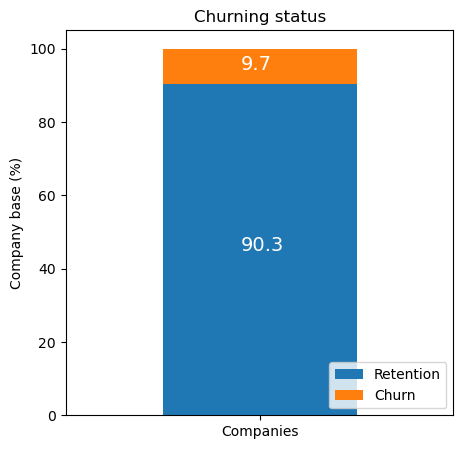

In [18]:
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

About 10% of customers churned

# Hypothesis Testing

In [5]:
cons = client_data.loc[:, ['cons_12m', 'churn']]
grouped = cons.groupby(['churn'])
grouped.mean()

,cons_12m
churn,
0,167867.266550
1,78862.478506


In [26]:
grouped.describe()

cons_12m                                                               \
         count           mean            std  min     25%      50%      75%   
churn                                                                         
0      13187.0  167867.266550  596815.827246  0.0  5645.0  14075.0  40763.5   
1       1419.0   78862.478506  260433.325508  0.0  5836.0  14529.0  40756.0   

                  
             max  
churn             
0      6207104.0  
1      3955941.0

In [27]:
gas_group = client_data.groupby('churn')
gas_group.value_counts(['has_gas'], normalize = True)

churn  has_gas
0      f          0.815424
       t          0.184576
1      f          0.847075
       t          0.152925
dtype: float64

Here I analyzed the differences in companies that had churned and those that didn't to find any attributes that must be considered in the model. The companies that didn't churn seem to use much more electricity that those that don't, but there is a lot of variance as shown by the standard deviation. A similar ratio of companies that have gas to ones that don't appears for both churned and not churned, which means that having gas isn't a strong indicator of churn.

In [35]:
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

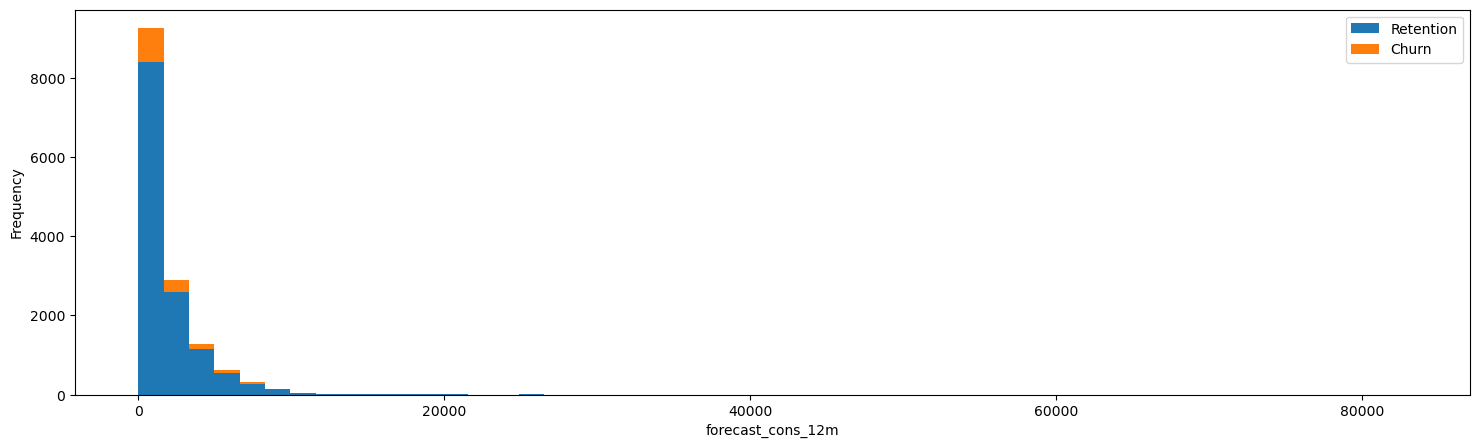

In [55]:
fig, ax = plt.subplots(nrows = 1, figsize = (18, 5))
plot_distribution(client_data, 'forecast_cons_12m', ax)

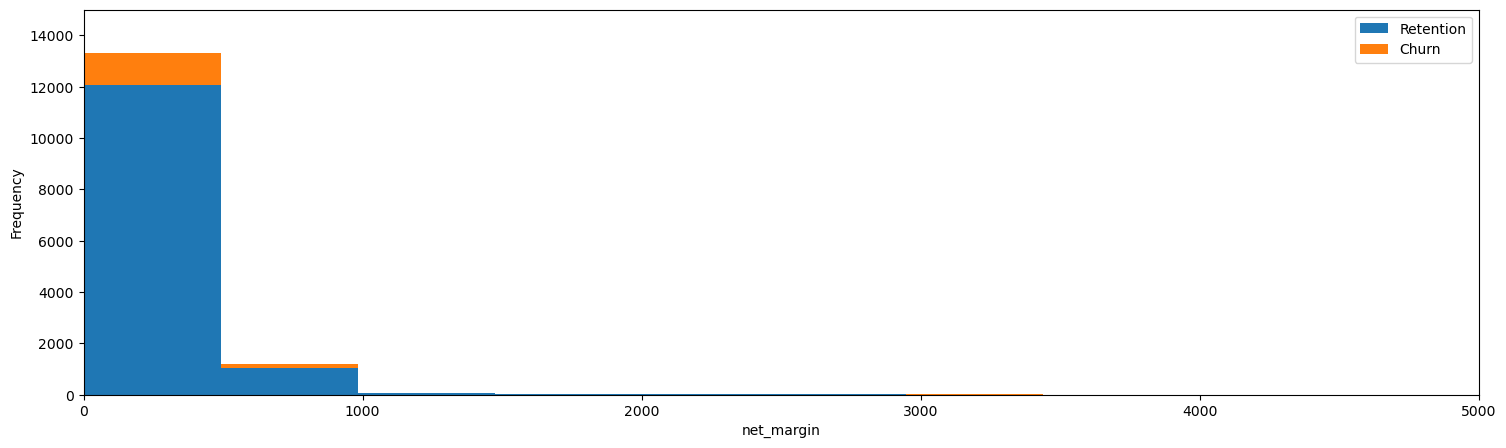

In [58]:
fig, ax2 = plt.subplots(nrows = 1, figsize = (18, 5))
ax2.axis([0, 5000, 0, 15000])
plot_distribution(client_data, 'net_margin', ax2)

Used the starter file distribution plot to get an understanding of the differences in future consumption based on churn. There seem to be churned companies represented at most consumption levels, but the majority of churned companies are in the most common consumption range. 

## Calculating Price Sensitivity

My approach to calculating price sensitivity will be to take divide the percent change in total consumption by the percent change in average price to get the elasticity of demand. Then I will group by 'churn' to find the average elasticity of demand for both segments of customers. 

In [28]:
price_data['average_2015'] = (price_data['price_off_peak_var'] + price_data['price_peak_var'] + price_data['price_mid_peak_var']) / 3 
temp = pd.DataFrame(data = price_data, columns = ['id', 'average_2015'])
merged_temp = temp.groupby('id').sum()
final = pd.merge(client_data, merged_temp, on = 'id')



I created an average price column in the price data set to get the average price over the 12 months. I then merged selected columns with the client_data DataFrame to consolidate the data locations

In [29]:
final['forecast_average'] = final['forecast_price_energy_off_peak'] + final['forecast_price_energy_peak']

I created a forecast_average column in the merged DataFrame to take the average price for the future 12 months

In [30]:
elasticity = final[['id','cons_12m', 'cons_gas_12m', 'forecast_cons_12m', 'average_2015', 'forecast_average', 'churn' ]].copy()
elasticity.insert(loc = 3, column = 'total_cons_12m', value = final['cons_12m'] + final['cons_gas_12m'])
elasticity['change_cons'] = (elasticity['total_cons_12m'] - elasticity['forecast_cons_12m']) / elasticity['total_cons_12m']
elasticity['change_price'] = (elasticity['average_2015'] - elasticity['forecast_average']) / elasticity['average_2015']
elasticity['EOD'] = elasticity['change_cons'] / elasticity['change_price']





I made a copy of the large DataFrame to select only the columns I needed for elasticity of demand (EOD) calculation. Added new columns for the first steps of EOD calculation and another column for the final EOD. 

In [31]:
index_null = elasticity[elasticity['EOD'].isnull()].index
elasticity.drop(index_null, inplace = True)

index_inf = elasticity[elasticity['EOD'] == -np.inf].index
elasticity.drop(index_inf, inplace = True)

In [51]:
elasticity.groupby(elasticity['churn']).mean(numeric_only = True)


,cons_12m,cons_gas_12m,total_cons_12m,forecast_cons_12m,average_2015,forecast_average,change_cons,change_price,EOD
churn,,,,,,,,,
0,169280.989904,30379.080688,199660.070593,1872.807797,0.886661,0.187582,0.914185,NaN,1.171711
1,79365.856028,9294.360993,88660.217021,1974.147624,0.926265,0.191314,0.910106,0.784834,1.161093


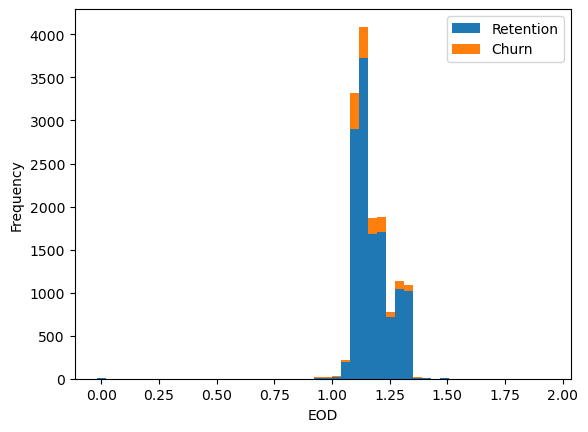

In [52]:
fig, axs = plt.subplots()
plot_distribution(elasticity, 'EOD', axs)

Dropped indexes where the EODs were null and -inf to then take a mean grouped by the churn rate. There doesn't appear to be a significant difference between the companies that churned and those that didn't based on my calculation, but the ones that churned do seem to have a large response to a change in price. The plot does seem to show that the majority of companies who churned has a relatively high price elasticity.